## Data

The main folder ‘Fseeds’ contains thousands of parent folders that store the calculations and data for a given protein sequence at a given Kdiss value. For each of these folders, there are 5 relevant subfolders corresponding to different seeds: rseed1…rseed5. They represent the same calculations with a different random seed. Due to the random fluctuating nature of the system, the 5 seeds are used to create an averaged data (average of the five diffusivity values only) that takes into account all the seeds.

#### Structure
One example of a folder is: “LVE_StickyRouse_Fseeds_0.9_0.02_111100000011110000001111”.

- Each node in the sequence is a bead, a coarse-grained Gaussian chain segment, and they are represented by “0” (a purely frictional bead) or “1” (a segment with a reversible association, or intermolecular bridge: “sticker”).
- LVE indicates that we are not working with flow, hence Linear ViscoElastic.
When flow is induced, in another notebook, the file will have a “NLVE” to indicate Non-Linear ViscoElasticity.
- The first decimal number is the fraction of closed stickers (p). Those which are already paired.
- The second decimal number measures the frequency of dissociation of the intermolecular connections, the Kdiss.

#### Data file formats

The most important raw data are stored in:
- param.in,  the file with the parameters for each calculation
- timeprogress_averaged.out
- msdfit.out

Other files include:
- stretch_distribution_transient.out
- stretch_distribution_steady.out
- Diffusivity.out
- G1G2.out
- timeprogress.out
- autocorrelation_functions.out
- particle_tracking.out
- loops.sh, script ran on York's Viking computer cluster

---
Author: Alexandre Hefren  
Synthetic data produced with [Viking Cluster](https://vikingdocs.york.ac.uk/).  
Project: Silk Protein Physics  
Physics of Life  
School of Physics, Engineering and Technology  
University of York

In [ ]:
# Import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import os, glob, and re for working with files and regex
import os
import glob
import re

%matplotlib inline

In [ ]:
# Data stored in G-Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds'

# Only count first-level folders within 'folder_path'
parent_folders = sum(os.path.isdir(os.path.join(folder_path, d)) for d in os.listdir(folder_path))

print(f'Total number of first-level folders is: {parent_folders}')

total_folders = 0

# Use os.walk to iterate through the folder recursively
for root, dirs, files in os.walk(folder_path):
    # Each 'dirs' is a list of subdirectories in the current 'root'
    total_folders += len(dirs)

print(f'Total number of folders (including subfolders) is: {total_folders}')

Total number of first-level folders is: 1564
Total number of folders (including subfolders) is: 9384


In [ ]:
# Let's see the structure of the subfolders inside the folders
limit_folders = 5
limit_subfolders = 3

# Use os.listdir to get the top-level directories (parent folders)
parent_folders = [d for d in os.listdir(folder_path)
                  if os.path.isdir(os.path.join(folder_path, d))][:limit_folders]

# Iterate over the parent folders
for folder in parent_folders:
    folder_path_full = os.path.join(folder_path, folder)
    print(f'Parent Folder: {folder_path_full}')

    # Get the list of subdirectories
    subfolders = [d for d in os.listdir(folder_path_full)
                  if os.path.isdir(os.path.join(folder_path_full, d))][:limit_subfolders]

    # Iterate over the subfolders and print them
    for subfolder in subfolders:
        print(f'  Subfolder: {os.path.join(folder_path_full, subfolder)}')



# Find the unique file extensions
unique_extensions = set()

print('---'*30)
print('Unique file extensions:')
for root, dirs, files in os.walk(folder_path):
#     for dir in dirs:
#         dir_path = os.path.join(root, dir)
#         print(dir_path)

   for file in files:
        file_path = os.path.join(root, file)

        # Extract the file extension
        _, file_extension = os.path.splitext(file)

        # Print only one file per extension
        if file_extension not in unique_extensions:
            print('---'*30)

            print(f'File type: {file_extension}, File path: {file_path}')
            unique_extensions.add(file_extension)


Parent Folder: /content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.02_111100000011110000001111
  Subfolder: /content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.02_111100000011110000001111/rseed1
  Subfolder: /content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.02_111100000011110000001111/rseed4
  Subfolder: /content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.02_111100000011110000001111/rseed3
Parent Folder: /content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.97_000000010000000100000001
  Subfolder: /content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.97_0000000100000001

In [ ]:
# What type of images we have included in the data

from collections import defaultdict

# Set to store unique file names
unique_imagefile = set()
# Store filenames and their full paths
file_paths = defaultdict(list)

# Use os.walk to iterate through the folder hierarchy
for root, dirs, files in os.walk(folder_path):
    # Add each unique .png file to the set
    for file in files:
        if file.endswith('.png') or file.endswith('jpg') or file.endswith('svg'):
            unique_imagefile.add(file)
            # Add the file path to the dictionary
            file_paths[file].append(os.path.join(root, file))

# Print the unique filenames and path
for file_name in unique_imagefile:
    print(f"File: {file_name}")
    print(f"  Source: {file_paths[file_name][0]}")


File: Rg (1).png
  Source: /content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.65_100000100000100000100000/rseed5/Rg (1).png
File: stretch_distribution (1).png
  Source: /content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.67_100000000001100000000001/rseed5/stretch_distribution (1).png
File: G1G2 (1).png
  Source: /content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.65_100000100000100000100000/rseed5/G1G2 (1).png
File: Rg.png
  Source: /content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.02_111100000011110000001111/rseed1/Rg.png
File: MSD (1).png
  Source: /content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.65_100000100000100000100000/rseed

### Parameters
- Nmolecules       # number of chains in the simulation   
- Ntime           # number of time steps
- TFAC          #initial time step size(should be less than 0.5)
- STIC_P       # fraction of closed stickers (0.9 standard)
- STIC_KDISS    # sticker dissociation rate in units of the bare Rouse time (tauS/tauR = 1/STIC_KDISS)
- Nprint        # interval for exporting data

**Typical values**:

Nmolecules= 200       
Ntime=100000000       
TFAC=0.4            
STIC_P= 0.9         
STIC_KDISS = range(0.01, 10)  
Nprint=200000      

### Diffusivity  
-file:  msdfit.out
- value: diffusivity
- std: standard deviation

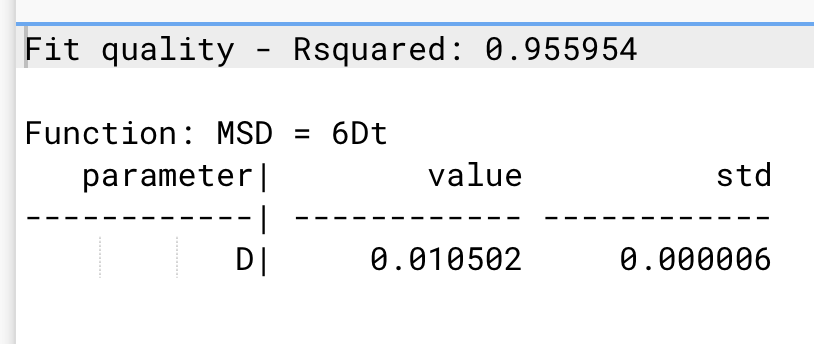

In [ ]:
# Define the pattern for the files we want to read
file_pattern = "/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/*/msd*.out"

# Use glob to find files matching the specified pattern
file_paths = glob.glob(file_pattern)

# Read and concatenate the files into a single DataFrame
df_raw = pd.concat(map(pd.read_fwf, file_paths))

# Display information
print("DataFrame Information:")
print(df_raw.info())

# Resulting DataFrame from the averaged msdfit.out files
# Only the diffusivity values are relevant for these
df_raw


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6280 entries, 0 to 3
Columns: 1565 entries, Fit quality - to Rsquared: -52.570209
dtypes: object(1565)
memory usage: 75.0+ MB
None


,Fit quality -,Rsquared: -13.466536,Rsquared: -529.425317,Rsquared: -181.830725,Rsquared: -43.355356,Rsquared: -15.395410,Rsquared: -2.548316,Rsquared: -189.540949,Rsquared: -12.888742,Rsquared: -4.899851,...,Rsquared: 0.509338,Rsquared: -2.784593,Rsquared: -205.965715,Rsquared: -2.863055,Rsquared: -46.193073,Rsquared: -50.239070,Rsquared: -2.135906,Rsquared: -7.668924,Rsquared: -80.129855,Rsquared: -52.570209
0,Function: MSD,= 6Dt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,parameter|,value std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,------------|,------------ ------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D|,0.000390 0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Function: MSD,NaN,= 6Dt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,D|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006778 0.000002,NaN
0,Function: MSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,= 6Dt
1,parameter|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,value std
2,------------|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,------------ ------------


In [ ]:
# Read all the files related to the initial sequence. Dataframe with parameters from the file names

# if you want to select, for example, only probability p=0.9: folder_path,'*(0.9)*','msdfit.out')

# Define the folder path where the files are located
folder_path = '/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/'

# Define the pattern for files you want to select (e.g., containing '*111111111111111111111111*msdfit.out')
file_pattern = os.path.join(folder_path, '*111111111111111111111111*', 'msdfit.out')   #construct paths

# String concateantion (Alternative to join)
# files_initial = glob.glob("/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/*111111111111111111111111*/msd*.out")

# Use glob to find files matching the specified pattern
files_initial = glob.glob(file_pattern)

# Create a list of DataFrames by reading FWF files from the found paths
df_initial =  [pd.read_fwf(file, header=None, sep=" ") for file in files_initial]

# Concatenate the DataFrames related to sequence 111111111111111111111111 into a single DataFrame
full_df_initial = pd.concat(df_initial, ignore_index=False)

full_df_initial

,0,1
0,Fit quality -,Rsquared: -1.980480
1,Function: MSD,= 6Dt
2,parameter|,value std
3,------------|,------------ ------------
4,D|,0.000352 0.000001
...,...,...
0,Fit quality -,Rsquared: -52.570209
1,Function: MSD,= 6Dt
2,parameter|,value std
3,------------|,------------ ------------


In [ ]:
# Create an empty list to store parameters extracted from file names
parameters_list = []

# Loop through the matching file names
for filename in glob.glob(os.path.join(folder_path,'*111111111111111111111111*','msdfit.out')):

# Extract numerical values from the file name using regular expressions
# regex = re.compile(r'\d{3,24}')
# pattern =regex.findall( filename)
    pattern =re.findall('\d{1,50}', filename)   #match any sequence of digits with length between 1 and 50.
    pattern2 = re.findall('(\d\.\d\d*)' , filename)  # Match floating-point numbers with two decimal places.

# Convert the extracted values to integers and floats

    pattern = [int(x) for x in pattern]
    pattern2 = [float(x) for x in pattern2]

# Create a numpy array of parameters and append it to the list
    parameters = np.array([pattern[-1], pattern2[0], pattern2[1] ])
    # parameters = pd.DataFrame(np.array([ np.array(pattern), np.array(pattern2) ]    )
    parameters_list.append(parameters)

# print(f'The sequence is {pattern[-1]} ')
# print(f'The dissociation frequency is {pattern2[1]}')
# print(parameters)

# Create a dataframe from the appended parameters list
# df_parameters = pd.DataFrame.from_records(appended_parameters)
columns= ['Sequence', 'p', 'Kdiss']
initial_parameters_df = pd.DataFrame(parameters_list, columns= columns)

print(f'The initial sequence has { len(initial_parameters_df["Kdiss"]) } values of Kdiss')
initial_parameters_df.head()

The initial sequence has 46 values of Kdiss


,Sequence,p,Kdiss
0,111111111111111111111111,0.9,0.12
1,111111111111111111111111,0.9,0.55
2,111111111111111111111111,0.9,0.62
3,111111111111111111111111,0.9,0.08
4,111111111111111111111111,0.9,0.04


In [ ]:
frequencies_number  = len(initial_parameters_df['Kdiss'])
print(f'The number of dissociation frequencies being analysed is {frequencies_number}')

The number of dissociation frequencies being analysed is 46


In [ ]:
folder_path = '/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds'

for id, filename in enumerate(glob.glob(os.path.join(folder_path,'*0.8_111111111111111111111111/*'))):
    print(id)
    print(filename)


0
/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.8_111111111111111111111111/2022_08_16_19_17_20_384812909
1
/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.8_111111111111111111111111/2022_08_22_11_22_19_862729890
2
/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.8_111111111111111111111111/loops.sh
3
/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.8_111111111111111111111111/timeprogress_averaged.out
4
/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.8_111111111111111111111111/msdfit.out
5
/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.8_1111111

**Note**: from all protein sequences with 24 beads, we choose the initial sequence '111111111111111111111111'.  
Data cover various values of dissociation frequency, $K_{\textrm{diss}}$. We fix to the case $K_{\textrm{diss}} =0.8$.
As a sample from the data, we take the first seed "rseed1" out of five seeds that produce averaged values in the corresponding parent folder.



In [ ]:
# Our analysis will focus on the initial sequence with Kdiss=0.8


from IPython.display import display

# Patterns
kdiss08_pattern0 =  os.path.join(folder_path, '*0.8_111111111111111111111111*', 'timeprogress*.out')   #this is an average of all seeds
kdiss08_pattern1 =  os.path.join(folder_path, '*0.8_111111111111111111111111/rseed1*', 'timeprogress.out') #take seed1 as sample
kdiss08_pattern2 =  os.path.join(folder_path, '*0.8_111111111111111111111111/rseed1*', 'G1G2.out')
kdiss08_pattern3 =  os.path.join(folder_path, '*0.8_111111111111111111111111/rseed1*', 'stretch_distribution_steady.out')
kdiss08_pattern4 =  os.path.join(folder_path, '*0.8_111111111111111111111111/rseed1*', 'stretch_distribution_transient.out')
kdiss08_pattern5 =  os.path.join(folder_path, '*0.8_111111111111111111111111/rseed1*', 'msdfit.out')

# Files
kdiss08_file0 = glob.glob(kdiss08_pattern0)
kdiss08_file1 = glob.glob(kdiss08_pattern1)
kdiss08_file2 = glob.glob(kdiss08_pattern2)
kdiss08_file3 = glob.glob(kdiss08_pattern3)
kdiss08_file4 = glob.glob(kdiss08_pattern4)
kdiss08_file5 = glob.glob(kdiss08_pattern5)

# DATA

# Time average file
print(f'File {kdiss08_file0}')
kdiss08_timeaverage_df = pd.concat(map(pd.read_fwf, kdiss08_file0))
display(kdiss08_timeaverage_df.head())
print(f'Shape: {kdiss08_timeaverage_df.shape}')

print('---'*60)

# Time progress
print(f'File {kdiss08_file1}')
kdiss08_time_df = pd.concat(map(pd.read_fwf, kdiss08_file1))
display(kdiss08_time_df.head())
print(f'Shape: {kdiss08_time_df.shape}')

print('---'*60)

# G1G2
print(f'File {kdiss08_file2}')
kdiss08_g1g2_df = pd.concat(map(pd.read_fwf, kdiss08_file2))
display(kdiss08_g1g2_df.head())
print(f'Shape: {kdiss08_g1g2_df.shape}')


print('---'*60)

# Stretch distribution - steady
print(f'File {kdiss08_file3}')
kdiss08_stretchdistribution_df = pd.concat(map(pd.read_fwf, kdiss08_file3))
display(kdiss08_stretchdistribution_df.head())
print(f'Shape: {kdiss08_stretchdistribution_df.shape}')

print('---'*60)

# Stretch distribution - transient
print(f'File {kdiss08_file4}')
kdiss08_stretchdistribution_transient_df = pd.concat(map(pd.read_fwf, kdiss08_file4))
display(kdiss08_stretchdistribution_transient_df.head())
print(f'Shape: {kdiss08_stretchdistribution_transient_df.shape}')

print('---'*60)

# MSD
print(f'File {kdiss08_file5}')
kdiss08_msd_df = pd.concat(map(lambda f: pd.read_fwf(f, header=None), kdiss08_file5))
display(kdiss08_msd_df.head())
print(f'Shape: {kdiss08_msd_df.shape}')


File ['/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.8_111111111111111111111111/timeprogress_averaged.out']


,0.000000e+00,0.000000e+00.1,0.000000e+00.2
0,0.012633,0.001716,0.000050
1,0.025266,0.003580,0.000073
2,0.050532,0.007193,0.000174
3,0.101065,0.013730,0.000352
4,0.202129,0.026577,0.000383


Shape: (526, 3)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
File ['/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.8_111111111111111111111111/rseed1/timeprogress.out']


,time/tauR,Nclosed,MSD/Re,MSDstd,Rg/Re,Rgstd,sxx,syy,szz,sxy sxz syz max_l P2
0,0.000000,4330,0.000000,0.000000,0.387931,0.103586,22.52434,23.61633,22.72413,8.231382e-02 3.463510e-01 -7.594464e-02 -1.371...
1,0.012633,4328,0.001608,0.001383,0.398906,0.103423,28.00475,27.95752,28.89457,-5.514406e-02 -5.141193e-01 -4.183581e-01 -1.3...
2,0.025266,4344,0.003411,0.002528,0.398028,0.103721,27.22253,27.47934,27.42813,3.518335e-01 4.287295e-01 2.009548e-01 -1.3710...
3,0.050532,4358,0.006621,0.004832,0.396831,0.103754,26.88007,28.44241,28.45636,-2.183193e-01 1.344620e-01 3.918417e-01 -1.371...
4,0.101065,4326,0.012542,0.010539,0.393710,0.100665,27.76133,27.97361,27.38144,-7.803633e-01 2.020007e-01 -1.084282e-01 -1.37...


Shape: (527, 10)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
File ['/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.8_111111111111111111111111/rseed1/G1G2.out']


,w,G'(w),G''(w)
0,0.011893,0.087079,0.754854
1,0.015171,0.137831,0.953179
2,0.019354,0.217526,1.196276
3,0.024690,0.339932,1.487235
4,0.031498,0.521385,1.823039


Shape: (40, 3)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
File ['/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.8_111111111111111111111111/rseed1/stretch_distribution_steady.out']


,Re,Pmean,Psem
0,0.006138,0.000000,0.000000
1,0.007316,0.000000,0.000000
2,0.008719,0.000000,0.000000
3,0.010392,0.000000,0.000000
4,0.012385,0.004595,0.007456


Shape: (40, 3)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
File ['/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.8_111111111111111111111111/rseed1/stretch_distribution_transient.out']


,6.138270e-03,0.000000e+00,0.000000e+00.1,0.000000e+00.2,0.000000e+00.3,0.000000e+00.4,0.000000e+00.5,0.000000e+00.6,0.000000e+00.7,0.000000e+00.8,...,0.000000e+00.515,0.000000e+00.516,0.000000e+00.517,0.000000e+00.518,0.000000e+00.519,0.000000e+00.520,0.000000e+00.521,0.000000e+00.522,0.000000e+00.523,0.000000e+00.524
0,0.007316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.008719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.010392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.014761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Shape: (39, 526)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
File ['/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/LVE_StickyRouse_Fseeds_0.9_0.8_111111111111111111111111/rseed1/msdfit.out']


,0,1
0,Fit quality -,Rsquared: 0.974203
1,Function: MSD,= 6Dt
2,parameter|,value std
3,------------|,------------ ------------
4,D|,0.001522 0.000002


Shape: (5, 2)


### Variables

time/tau_R - time in units of Rouse time $\tau_R$  
tau_R - the Rouse time  
tau_SR - the sticky-Rouse time  
D_SR  - sticky-Rouse diffusivity  
D_R  - the known Rouse diffusivity  
Res: end-to-end distances (for each molecule) (=1 at equilibrium without flow)  
MSD - mean-square dispalcmeent of the center of mass    
Pmean - mean average of distribution P(Re)  
Psem  - standard error of the mean average  
G'   - storage module  
G'' - loss module  
w - frequency (1/t)
Rg - radius of gyration  
$\sigma$ - stress tensor (s_xy, s_xx, s_xz, ...)   

**Rouse Diffusivity**:   

In three dimensions, it holds that
$$\textrm{MSD} = 6Dt,$$ where the diffusivity for nonsticky polymers is given by
$$D_R = \frac{1}{3\pi^2} \frac{\left\langle R_e\right\rangle^2}{\tau_R}.$$
For the times, the following realtions holds true:

$$\tau_{\textrm{SR}} = \frac{D_R}{D_{\textrm{SR}}} \tau_S,$$
where $\tau_S$ is the dissociation time or sticker's lifetime.

See: [Rouse model](https://en.wikipedia.org/wiki/Rouse_model).  
[Viscoelastic](https://en.wikipedia.org/wiki/Viscoelasticity) properties of the protein sequences is captured by the dynamic modulus.  

Reference: [Theoretical rheo-physics of silk: Intermolecular associations reduce the critical specific work for flow-induced crystallization](https://pubs.aip.org/sor/jor/article/66/3/515/2846138/Theoretical-rheo-physics-of-silk-Intermolecular)

In [ ]:
# Take the timeprogress.out file

# Prepare data
kdiss08_time_df1 = kdiss08_time_df.iloc[:,:-1]
kdiss08_time_df2 = kdiss08_time_df.iloc[:,-1]

kdiss08_time_df2 = kdiss08_time_df2.str.split(' ', n=5, expand=True)

In [ ]:
# Rename the new columns
kdiss08_time_df2.columns = ['sxy', 'sxz', 'syz', 'max_l', 'P2', 'Res']

# Res: end to end distances (for each molecule)

In [ ]:
# Timeprogress data - cleaned
kdiss08_time_df = pd.concat([kdiss08_time_df1, kdiss08_time_df2], axis=1)
kdiss08_time_df.head()

,time/tauR,Nclosed,MSD/Re,MSDstd,Rg/Re,Rgstd,sxx,syy,szz,sxy,sxz,syz,max_l,P2,Res
0,0.000000,4330,0.000000,0.000000,0.387931,0.103586,22.52434,23.61633,22.72413,8.231382e-02,3.463510e-01,-7.594464e-02,-1.371063e+00,1.434869e-02,1.471256e+00 1.219252e+00 5.604064e-01 7.81346...
1,0.012633,4328,0.001608,0.001383,0.398906,0.103423,28.00475,27.95752,28.89457,-5.514406e-02,-5.141193e-01,-4.183581e-01,-1.371063e+00,6.292659e-03,1.243110e+00 1.121659e+00 5.843246e-01 7.12949...
2,0.025266,4344,0.003411,0.002528,0.398028,0.103721,27.22253,27.47934,27.42813,3.518335e-01,4.287295e-01,2.009548e-01,-1.371063e+00,1.076440e-02,1.379003e+00 1.036042e+00 7.054498e-01 7.31306...
3,0.050532,4358,0.006621,0.004832,0.396831,0.103754,26.88007,28.44241,28.45636,-2.183193e-01,1.344620e-01,3.918417e-01,-1.371063e+00,1.048407e-02,1.227684e+00 9.094969e-01 4.831251e-01 6.26909...
4,0.101065,4326,0.012542,0.010539,0.393710,0.100665,27.76133,27.97361,27.38144,-7.803633e-01,2.020007e-01,-1.084282e-01,-1.371063e+00,1.403482e-02,1.715238e+00 1.055889e+00 6.352241e-01 4.48734...


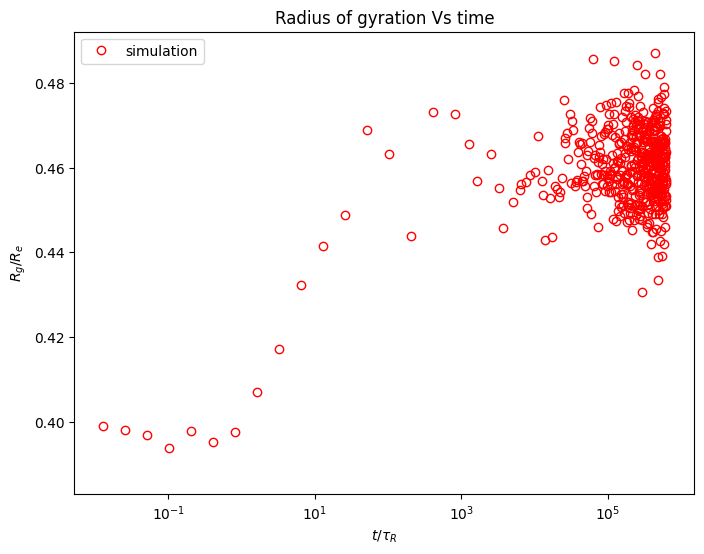

In [ ]:
# Radius of gyration
fig, ax = plt.subplots(figsize =(8, 6))
ax.plot(kdiss08_time_df['time/tauR'], kdiss08_time_df['Rg/Re'], 'ro', markerfacecolor='none', label='simulation' )

plt.xlabel(r'$t/\tau_R$')
plt.ylabel(r'$R_g / R_e$') #raw string for correct LaTeX


# ax.set_yscale('log')
ax.set_xscale('log')

plt.legend()
plt.title('Radius of gyration Vs time')
plt.show()

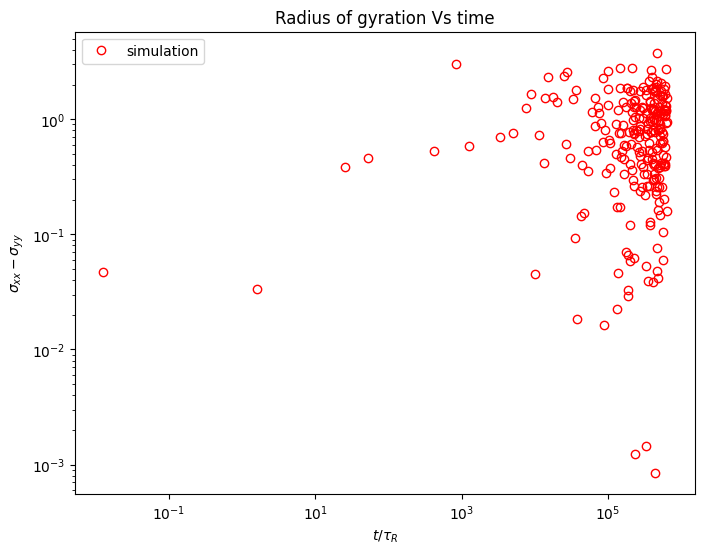

In [ ]:
# First normal stress difference (N1) for the stress tensor sigma

N1 = kdiss08_time_df['sxx'] - kdiss08_time_df['syy']
fig, ax = plt.subplots(figsize =(8, 6))
ax.plot(kdiss08_time_df['time/tauR'], N1, 'ro', markerfacecolor='none', label='simulation' )

plt.ylabel(r'$\sigma_{xx} - \sigma_{yy}$')
plt.xlabel(r'$t/\tau_{R}$') #raw string for correct LaTeX

ax.set_yscale('log')
ax.set_xscale('log')

plt.legend()
plt.title('Radius of gyration Vs time')
plt.show()

In [ ]:
# Note objects instead of float
kdiss08_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time/tauR  527 non-null    float64
 1   Nclosed    527 non-null    int64  
 2   MSD/Re     527 non-null    float64
 3   MSDstd     527 non-null    float64
 4   Rg/Re      527 non-null    float64
 5   Rgstd      527 non-null    float64
 6   sxx        527 non-null    float64
 7   syy        527 non-null    float64
 8   szz        527 non-null    float64
 9   sxy        527 non-null    object 
 10  sxz        527 non-null    object 
 11  syz        527 non-null    object 
 12  max_l      527 non-null    object 
 13  P2         527 non-null    object 
 14  Res        527 non-null    object 
dtypes: float64(8), int64(1), object(6)
memory usage: 61.9+ KB


In [ ]:
# End-to-end distance 'Res' has 200 values - 200 molecule chains used for each sequence
Res_df = kdiss08_time_df['Res'].str.split(' ', expand=True)
Res_df = Res_df.astype(float) #set as float
Res_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.471256,1.219252,0.560406,0.781347,1.246349,0.722089,0.676542,0.554428,0.545019,1.229576,...,1.128713,1.238735,1.575048,0.979778,1.046116,0.969839,0.995762,0.952669,1.542625,0.415291
1,1.243110,1.121659,0.584325,0.712950,1.297944,1.033005,0.624708,0.788100,0.382070,1.107425,...,0.981865,1.448392,1.546129,1.004401,1.030845,0.853152,0.959791,1.038719,1.498847,0.443933
2,1.379003,1.036042,0.705450,0.731307,1.274671,1.024030,0.734898,0.814309,0.235242,1.150970,...,0.986235,1.514831,1.425668,1.096875,1.030580,0.772569,0.933703,1.062899,1.491438,0.370324
3,1.227684,0.909497,0.483125,0.626909,1.392434,1.080170,0.884665,0.625655,0.696220,1.239814,...,0.836892,1.452218,1.450148,0.987208,0.937107,0.767582,1.038583,1.258508,1.683905,0.103103
4,1.715238,1.055889,0.635224,0.448734,1.620696,0.956530,0.771334,0.761917,0.430793,1.433352,...,0.823870,1.736634,1.774745,1.187621,0.840283,0.856631,0.949757,1.395026,1.488641,0.389009


In [ ]:
kdiss08_msd_df = kdiss08_msd_df[1].str.split(' ', n=2, expand=True)

kdiss08_msd_df

,0,1,2
0,Rsquared:,0.974203,None
1,=,6Dt,None
2,value,,std
3,------------,------------,None
4,0.001522,,0.000002


In [ ]:
# Diffusivity (sticky-Rouse) for rseed1 - sequence 111111111111111111111111
DSR_rseed1 = float(kdiss08_msd_df[0][4])
print(f' The sticky-Rousy diffusivity is {DSR_rseed1}')

 The sticky-Rousy diffusivity is 0.001522


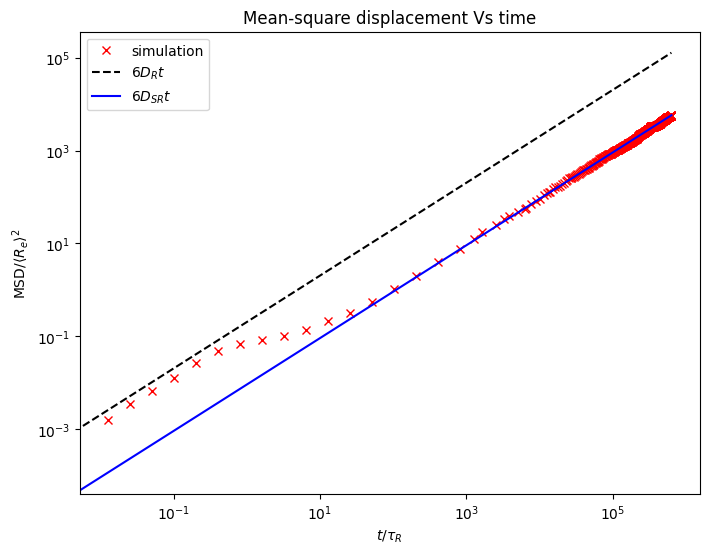

In [ ]:
X = kdiss08_time_df['time/tauR']
y = kdiss08_time_df['MSD/Re']
# y = kdiss08_time_df['MSD/Re'].to_numpy()


fig, ax = plt.subplots(figsize =(8, 6))
ax.plot(X, y, 'rx', label='simulation' )
ax.plot(X, X*6/(3*np.pi**2), 'k--', label='6$D_R$$t$' )
ax.plot(X, 6*X* DSR_rseed1, 'b-', label='6$D_{SR}$$t$')

#plt.yscale("log")
#plt.xscale('log')

ax.set_xscale("log")
ax.set_yscale("log")
#plt.xticks(np.arange(0, 100, step=0.2))
#ax.set_yticks([0.01, 1, 2])
#ax.set_xlim(0.01,1000)

import matplotlib
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=5)
ax.xaxis.set_major_locator(locmaj)

# ax.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=True,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False, # labels along the bottom edge are off
#     width=1.0,
#     length=4,
#     direction='in')

# from matplotlib.ticker import AutoMinorLocator
# ax.xaxis.set_minor_locator(AutoMinorLocator())
# ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.xlabel(r'$t/\tau_{R}$') #raw string for correct LaTeX
plt.ylabel(r'MSD$/ \left \langle R_{e} \right \rangle^2$')
plt.title('Mean-square displacement Vs time')
plt.legend()

plt.grid(False)
plt.show()

In [ ]:

kdiss08_g1g2_df.columns

Index(['w', 'G'(w)', 'G''(w)'], dtype='object')

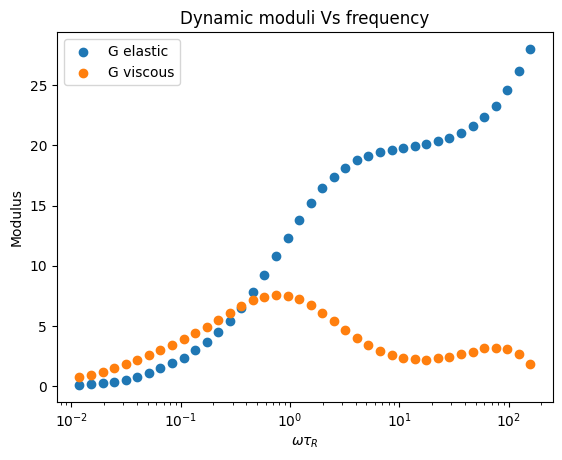

In [ ]:
# Viscoelasticity - linear rheology


plt.scatter(kdiss08_g1g2_df['w'], kdiss08_g1g2_df["G'(w)"], label="G elastic")
plt.scatter(kdiss08_g1g2_df['w'], kdiss08_g1g2_df["G''(w)"], label="G viscous")

plt.xlabel(r'$\omega \tau_R$')
plt.ylabel('Modulus')
plt.xscale('log')

plt.title('Dynamic moduli Vs frequency')
plt.legend()

plt.show()

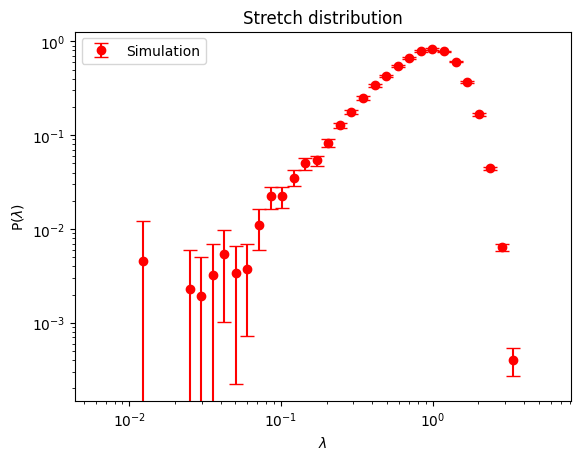

In [ ]:
# Stretch distribution of the chain (linear regime)

# Error bar - scatter
plt.errorbar(
    kdiss08_stretchdistribution_df['Re'],
    kdiss08_stretchdistribution_df["Pmean"],
    yerr=kdiss08_stretchdistribution_df["Psem"],
    fmt='ro',  # scatter
    label="Simulation",
    capsize= 5,
    capthick=1  # thickness

)

# Note: lambda= Re/R0 ; and R0 = 1 (without flow)
plt.xlabel(r'$\lambda$')
plt.ylabel('P($\lambda$)')
plt.xscale('log')
plt.yscale('log')

plt.title('Stretch distribution')
plt.legend()

plt.show()

### Initial and target sequences

Each sequence of our data has 24 beads.
The number of stickers, represented by "1", is given by $Z_s$.

The data analysed in this notebook has the following values included:
$Z_s= 2, 3, 4, 6, 12, 24$.

Thus, there is only one polymer sequence, our initial sequence, with $Z_s=24$, namely:
- 111111111111111111111111

All other sequences are called 'target sequences'.
For example, polymer sequences with $Z_s=12$ are:

- 101010101010101010101010

- 010101010101010101010101

- 111111000000000000111111

- 000000111111111111000000

- 111100000011110000001111

- 000011111100001111110000

- 111110000001100000011111

- 000001111110011111100000

- 001011011100100011001101  


One task is to study the influence of the stickers on the dynamics of the self-assembly process of silk protein. The influence of stickers will be analysed by two main aspects:
1. the number of stickers included in a sequence
2. the position of the stickers along the chain

See image below for more sequences.

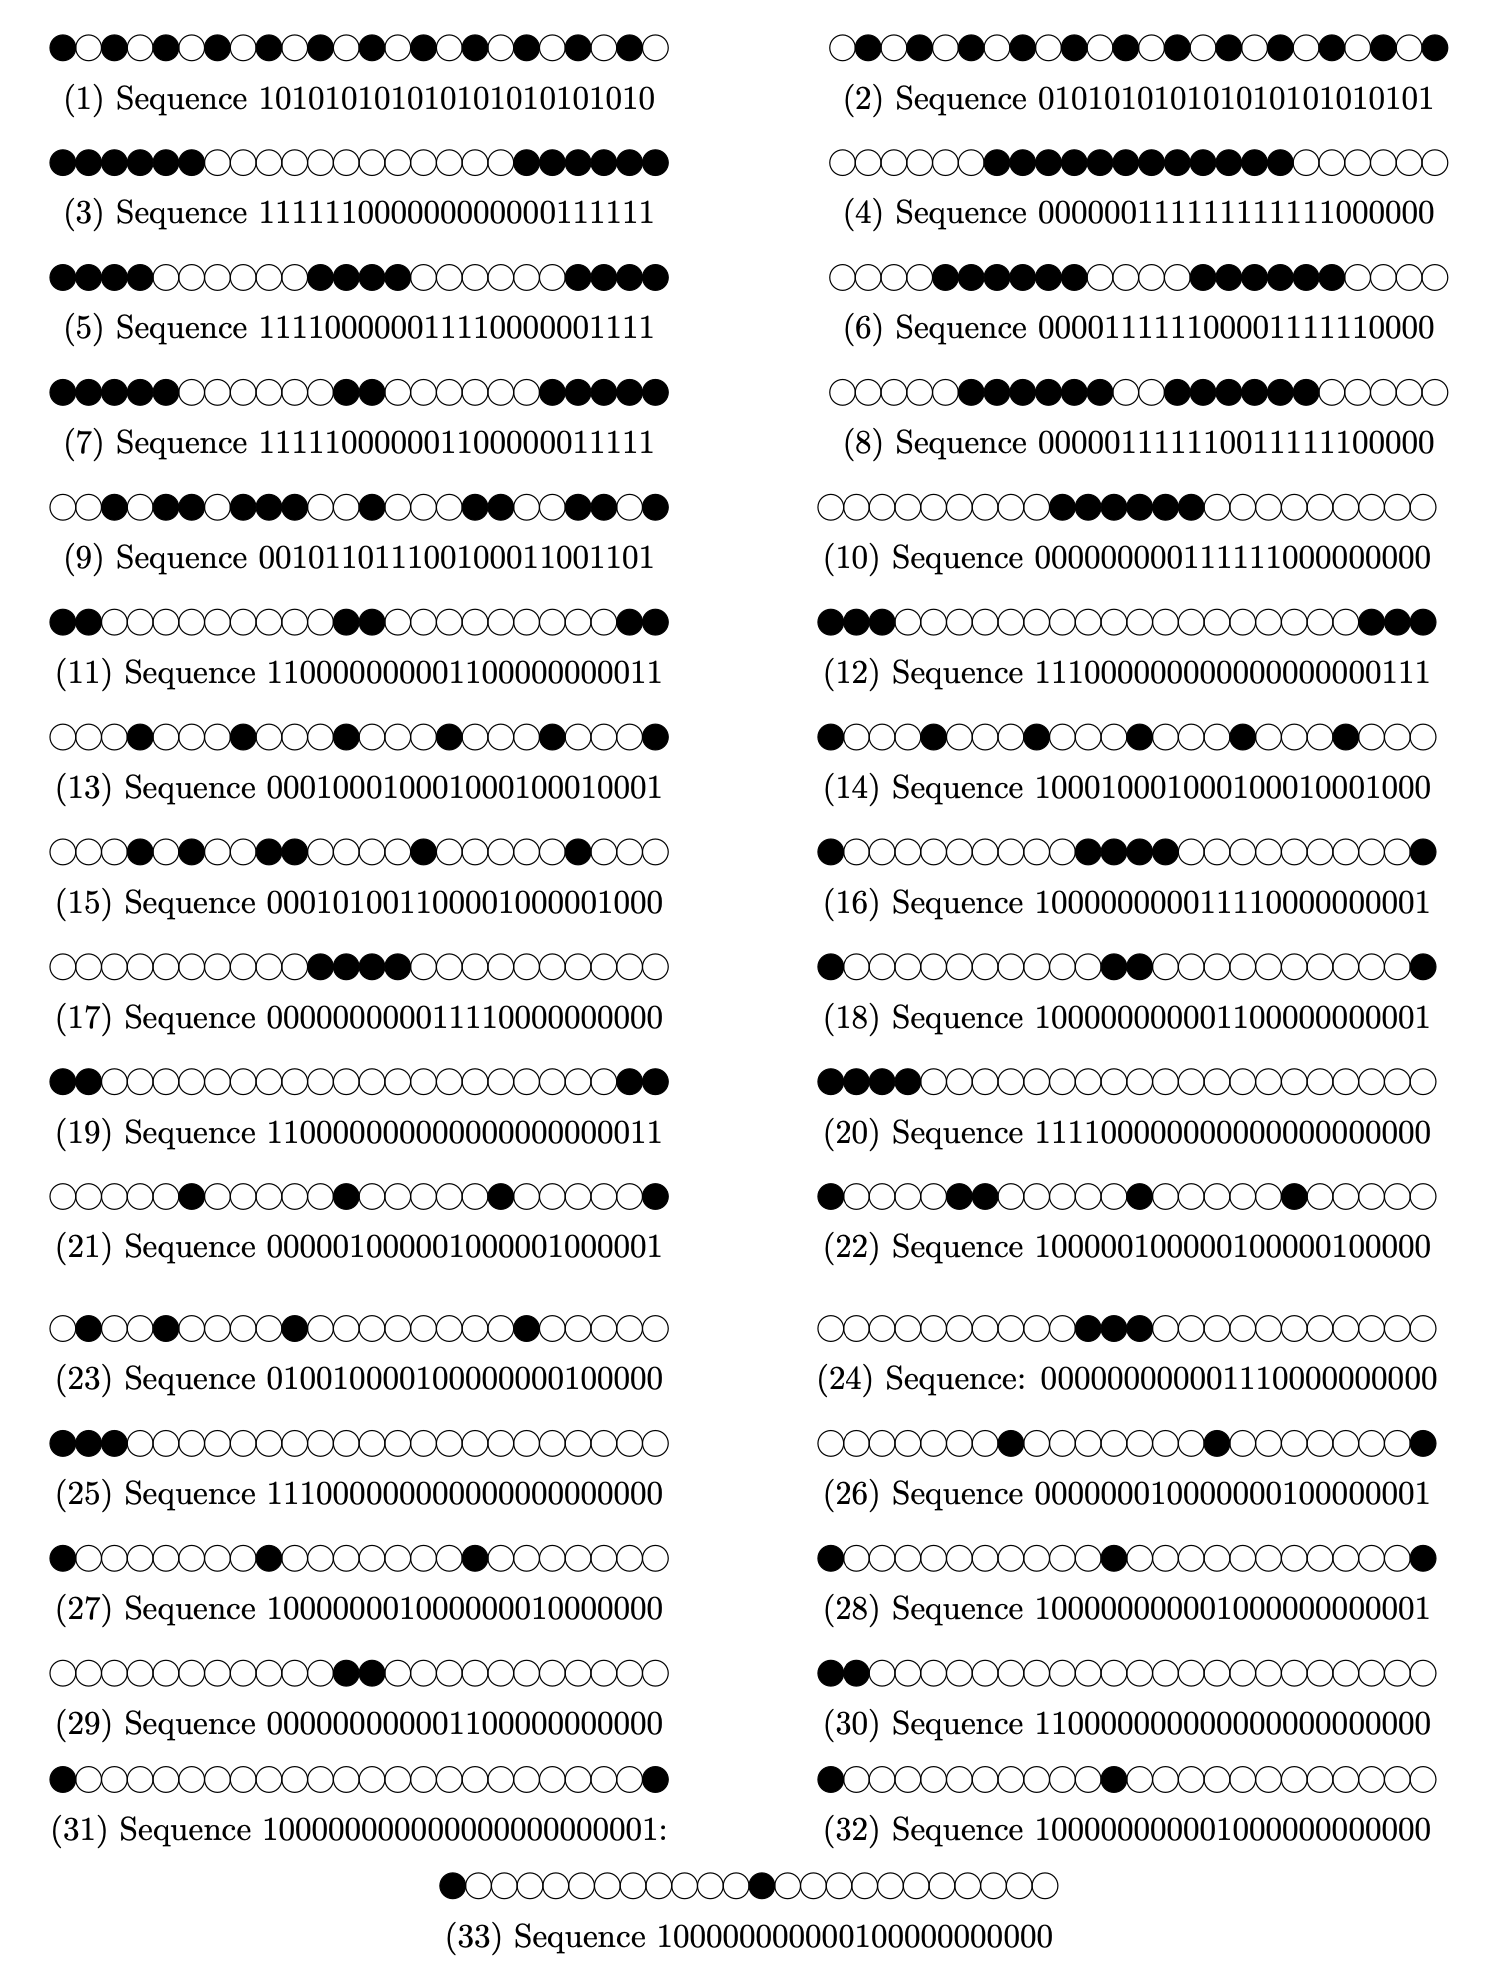

In [ ]:
# Read all the files related to the target sequence.


# files_target = glob.glob("/content/drive/MyDrive/Morus3D/Selected_output/From_Viking/*(111100000011110000001111)*/msd*.out")

folder_path = '/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/'

def filesglob(target_directories):
  """Find and process files based on target directories. All sequences, apart from the initial chosen sequence, are targets.
  Input the name of the folders, which are uniquely defined by their sequences of 0s and 1s"""
  # DEBUG
  #  a =[]
  #  for i in range(len(target_directory)):
  #    files_target =  glob.glob("/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds" + target_directory[i] + "/msdfit.out")
  #    dataframe_target = [pd.read_fwf(file, header=None, sep=" ") for file in files_target]
  #    target_dfs_raw = pd.concat(dataframe_target, ignore_index=False)
  #    a.append(target_dfs_raw)
  #  return a

  result_dataframes = []
  processed_files = set()

  for target in target_directories:

        # Construct the file pattern using the folder path and the target directory
        file_pattern = os.path.join(folder_path, f'{target}', 'msd*.out')

        # Use glob to find files matching the specified pattern
        files = glob.glob(file_pattern)
        # Print matched files for debugging

        # Avoid any extra files "()"  that should not be in the data
        import re
        # Regex pattern to match filenames with optional whitespace, numbers in parentheses, before the .out extension
        duplicate_file_pattern = re.compile(r"\s*\(\d+\)\.out$")

        # Use list comprehension to filter out files that are duplicates or have already been processed

        # Filter out files that have been processed or that are duplicates like 'msdfit (1).out'
        files_to_process = [file for file in files if not duplicate_file_pattern.search(file) and file not in processed_files]


        # Create DataFrames by reading files from the found paths
        dataframe_target_list = [pd.read_fwf(file, header=None, sep=" ").assign(Source=file) for file in files_to_process]
        #only the files left after filtering any possible mistake
        # each entry in files is a full path: /path/to/sequence_folder/msdfit.out.



        # Add the processed file paths to the set
        processed_files.update(files)

        # Concatenate the DataFrames into a single DataFrame
        full_df = pd.concat(dataframe_target_list, ignore_index=False)

        result_dataframes.append(full_df)

  return result_dataframes

# Keep sequences in the following order

Zs12= ['*101010101010101010101010*', '*010101010101010101010101*', '*111111000000000000111111*',
       '*000000111111111111000000*','*111100000011110000001111*' ,'*000011111100001111110000*',
       '*111110000001100000011111*', '*000001111110011111100000*', '*001011011100100011001101*' ]

Zs6 = ['*100010001000100010001000*', '*000100010001000100010001*','*111000000000000000000111*',
       '*000000000111111000000000*', '*110000000001100000000011*',
                 '*100000000011110000000001*', '*000101001100001000001000*']


Zs4 = ["*100000100000100000100000*","*000001000001000001000001*","*110000000000000000000011*" ,
       "*000000000011110000000000*","*100000000001100000000001*",
             "*111100000000000000000000*"  , "*010010000100000000100000*" ]

Zs3 = ["*100000001000000010000000*", "*000000010000000100000001*", "*111000000000000000000000*",
       "*000000000001110000000000*",  "*100000000001000000000001*"]


Zs2 =["*100000000000100000000000*",  "*110000000000000000000000*", "*000000000001100000000000*",
      "*100000000000000000000001*", "*100000000001000000000000*"  ]

target_directory = Zs12 + Zs6 + Zs4 + Zs3 + Zs2

# Process files based on target directories
target_dfs_raw = filesglob(target_directory)

In [ ]:
# First DataFrame
target_dfs_raw[0].tail()

,0,1,Source
0,Fit quality -,Rsquared: -1.426008,/content/drive/MyDrive/alexandre.hefren@york.a...
1,Function: MSD,= 6Dt,/content/drive/MyDrive/alexandre.hefren@york.a...
2,parameter|,value std,/content/drive/MyDrive/alexandre.hefren@york.a...
3,------------|,------------ ------------,/content/drive/MyDrive/alexandre.hefren@york.a...
4,D|,0.003714 0.000001,/content/drive/MyDrive/alexandre.hefren@york.a...


In [ ]:
# # DEBUG - finding a particular value causing problem with duplicates

# # Example to find the duplicate value
# value_to_find = 0.003408
# duplicates = []

# # Considering that diffusivity value is on row index 4 and column index '0'
# for df in target_dfs_raw:
#     duplicates.append(df[(df[1].index == 4) & (df[1].astype(str).str.contains(str(value_to_find)))])

# # Concatenate all the DataFrames that contain the duplicates
# all_duplicates = pd.concat(duplicates)

# # Show where the duplicates come from
# print(all_duplicates[['Source', 0]])

# all_duplicates[['Source', 0]]

In [ ]:
# CHECK
# NOTE: target_dfs_raw has length given by the number of sequences
# The number of target directories - or the number of sequences
import warnings
sequences_number = len(target_directory)
print(f'The number of sequences is {sequences_number} ')
print(f'The number of DataFrames in the target list is {len(target_dfs_raw)} ')

if sequences_number != len(target_dfs_raw):
        warnings.warn(f'The data doesnt have the expected length')

The number of sequences is 33 
The number of DataFrames in the target list is 33 


In [ ]:
# Example of parameters from the target directories
# Most important here: Kdiss values

# Create a list to store parameters extracted from file names
extracted_parameters = []

# Iterate through files in the specified folder path
for filename in glob.glob(os.path.join(folder_path,'*111100000011110000001111*','msdfit.out')):

    # Extract numerical values using regex
    pattern =re.findall('\d{1,50}', filename)
    pattern2 = re.findall('(\d\.\d\d*)' , filename)


    pattern = [int(x) for x in pattern]
    pattern2 = [float(x) for x in pattern2]

    # Create an array of parameters from the extracted values
    parameters = np.array([pattern[-1], pattern2[0], pattern2[1] ])
    extracted_parameters.append(parameters)

print(f'The sequence is {pattern[-1]} ')
print(f'The dissociation frequency is {pattern2[1]}')
print(parameters)
print('---'*20)

# Store the extracted parameters
target_parameters_df = pd.DataFrame(extracted_parameters)
target_parameters_df.tail()

The sequence is 111100000011110000001111 
The dissociation frequency is 0.06
[111100000011110000001111 0.9 0.06]
------------------------------------------------------------


,0,1,2
41,111100000011110000001111,0.9,0.87
42,111100000011110000001111,0.9,0.07
43,111100000011110000001111,0.9,0.57
44,111100000011110000001111,0.9,0.82
45,111100000011110000001111,0.9,0.06


In [ ]:
# # DEBUG - Checking files without any filter
# # Check raw data of the first sequence
# a = []

# for i in range(len(target_directory)):
#      files_target =  glob.glob("/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/" + target_directory[i] + "/msd*.out")
#      dataframe_target = [pd.read_fwf(file, header=None, sep=" ") for file in files_target]
#      target_dfs_raw = pd.concat(dataframe_target, ignore_index=False)
#      a.append(target_dfs_raw)
# a[1]

In [ ]:
# Determine how and where to split the data to obtain the relevant parameters
#goal: diffusivity

# List with data from msdfit.out files
# df[1] selects the column with the diffusivities
msdfit_target_list = [df[1].str.split(' - ', n=1, expand=True) for df in target_dfs_raw]

# Example of the 2nd sequence raw data
seq1_raw =  msdfit_target_list[1]


# Data is restricted to rows 4 and column 0
print(f'There are {len(seq1_raw.loc[4,0])} values')
print(seq1_raw.loc[4,0].tail())

# Display the raw data for the 2nd sequence
seq1_raw

There are 46 values
4    0.000510     0.000001
4    0.000247     0.000001
4    0.004199     0.000002
4    0.000783     0.000001
4    0.003691     0.000001
Name: 0, dtype: object


,0
0,Rsquared: -11.595843
1,= 6Dt
2,value std
3,------------ ------------
4,0.001398 0.000001
...,...
0,Rsquared: -180.029920
1,= 6Dt
2,value std
3,------------ ------------


In [ ]:
# List of target diffusivity values and standard deviations
msdfit_target_list = [df[1].str.split(' ', n=2, expand=True) for df in target_dfs_raw]

# first sequence raw data
first_sequence_raw_data = msdfit_target_list[0]
first_sequence_raw_data

,0,1,2
0,Rsquared:,-181.830725,None
1,=,6Dt,None
2,value,,std
3,------------,------------,None
4,0.002130,,0.000003
...,...,...,...
0,Rsquared:,-1.426008,None
1,=,6Dt,None
2,value,,std
3,------------,------------,None


In [ ]:
# Extract all diffusivitives corresponding to the first sequence

print(f'Total number of diffusivity values for this sequence is {len(first_sequence_raw_data.loc[4,0].to_list())}')

# First 10 values
first_sequence_raw_data.loc[4,0].to_list()[:10]

Total number of diffusivity values for this sequence is 46


['0.002130',
 '0.000285',
 '0.004324',
 '0.000448',
 '0.002135',
 '0.003666',
 '0.000745',
 '0.001030',
 '0.004604',
 '0.002847']

In [ ]:
# DEBUG
# Sanity check for duplicates and dimensions
from collections import Counter

def find_duplicates(input_list):
    counter = Counter(input_list)
    duplicates = [item for item, count in counter.items() if count > 1]
    return duplicates

# Check duplicates in the diffusivity list
for i, target_element in enumerate(msdfit_target_list):
    diffusivity_list = target_element.loc[4,0].to_list()
    duplicates = find_duplicates(diffusivity_list)

    if duplicates:
        print(f"""diffusivity_list of sequence {i} has the same diffusivity value for: {duplicates}.
                   Make sure the frequencies are different.
                   ----------------------------------------""")

# Assert dimensions match - Diffusivity Vs Kdiss
fail = 0

for i in range(sequences_number):
    # print(f'Total number of diffusivite values for sequence {i} is {len(msdfit_target_list[i].loc[4,0].to_list())}')
    try:
        assert len(msdfit_target_list[i].loc[4,0].to_list()) == frequencies_number, f"Sequence {i} has a mismatch between diffusivities and frequencies"
    except AssertionError as m:
         fail += 1
         print(f'AssertionError: {m}')

if fail == 0:
    print("No assertions failed! There is no mismatch between the number of frequencies and diffusivities")
else:
    print(f"The assertion failed {fail} times.")

# # IF duplicates:

# # Create a list to store the diffusivity values for all sequences
# diffusivity_values_list = []

# # Iterate through the sequences
# for i in range(sequences_number):
#     # Extract the diffusivity values for the current sequence
#     diffusivity_values = msdfit_target_list[i].loc[4, 0].to_list()

#     # Create a new list with unique values while preserving the order
#     unique_diffusivity_values = []
#     for value in diffusivity_values:
#         if value not in unique_diffusivity_values:
#             unique_diffusivity_values.append(value)

#     # Append the list of unique diffusivity values to the main list
#     diffusivity_values_list.append(unique_diffusivity_values)

diffusivity_list of sequence 22 has the same diffusivity value for: ['0.012728'].
                   Make sure the frequencies are different.
                   ----------------------------------------
diffusivity_list of sequence 23 has the same diffusivity value for: ['0.014196'].
                   Make sure the frequencies are different.
                   ----------------------------------------
No assertions failed! There is no mismatch between the number of frequencies and diffusivities


In [ ]:
# Create a list to store the diffusivity values for all sequences
diffusivity_values_list = []

# Iterate through the sequences
for i in range(sequences_number):
    # Extract the diffusivity values for the current sequence
    diffusivity_values = msdfit_target_list[i].loc[4, 0].to_list()

    # Append the list of unique diffusivity values to the main list
    diffusivity_values_list.append(diffusivity_values)

# Example - 1st sequence
diffusivity_values_list[0][:10]

['0.002130',
 '0.000285',
 '0.004324',
 '0.000448',
 '0.002135',
 '0.003666',
 '0.000745',
 '0.001030',
 '0.004604',
 '0.002847']

In [ ]:
# List to store diffusivity values for the target sequences as FLOAT
diffusivity_target_values_list = []
#list_of_series = []

for i in range(len(target_directory)):
    # Create a new list with a copy of the diffusivity values for the current sequence
    diffusivity_target_values_list.append(diffusivity_values_list[i].copy())

    # Convert the diffusivity values to float
    diffusivity_target_values_list[i] = [float(x) for x in diffusivity_target_values_list[i]]

    # Convert the list to a pandas Series and append to the list_of_series
    #list_of_series.append(pd.Series(diffusivity_target_values_list[i]))
    diffusivity_target_values_list[i] = pd.Series(diffusivity_target_values_list[i])

# example: fist sequence and its first 10 values (float)
diffusivity_target_values_list[0][:10]

0    0.002130
1    0.000285
2    0.004324
3    0.000448
4    0.002135
5    0.003666
6    0.000745
7    0.001030
8    0.004604
9    0.002847
dtype: float64

In [ ]:
# Display all imported files corresponding to the initial sequence

folder_path = '/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds'

# if want to select, for example, only sequence=1111: folder_path,'*(1111)*','msdfit.out')
for id, filename in enumerate(glob.glob(os.path.join(folder_path,'*111111111111111111111111*','msdfit.out'))):

    df_initial_raw = pd.read_fwf(filename)


  # Print the location and filename of our initial source seqeunces full of stickers ("1")

    print('Data corresponding to initial sequence')
    print('File Name:', id, filename.split("From_Viking")[-1])


df_initial_raw.head()

Data corresponding to initial sequence
File Name: 0 /Fseeds/LVE_StickyRouse_Fseeds_0.9_0.12_111111111111111111111111/msdfit.out
Data corresponding to initial sequence
File Name: 1 /Fseeds/LVE_StickyRouse_Fseeds_0.9_0.55_111111111111111111111111/msdfit.out
Data corresponding to initial sequence
File Name: 2 /Fseeds/LVE_StickyRouse_Fseeds_0.9_0.62_111111111111111111111111/msdfit.out
Data corresponding to initial sequence
File Name: 3 /Fseeds/LVE_StickyRouse_Fseeds_0.9_0.08_111111111111111111111111/msdfit.out
Data corresponding to initial sequence
File Name: 4 /Fseeds/LVE_StickyRouse_Fseeds_0.9_0.04_111111111111111111111111/msdfit.out
Data corresponding to initial sequence
File Name: 5 /Fseeds/LVE_StickyRouse_Fseeds_0.9_0.37_111111111111111111111111/msdfit.out
Data corresponding to initial sequence
File Name: 6 /Fseeds/LVE_StickyRouse_Fseeds_0.9_0.27_111111111111111111111111/msdfit.out
Data corresponding to initial sequence
File Name: 7 /Fseeds/LVE_StickyRouse_Fseeds_0.9_0.8_1111111111111

,Fit quality -,Rsquared: -52.570209
0,Function: MSD,= 6Dt
1,parameter|,value std
2,------------|,------------ ------------
3,D|,0.000581 0.000000


In [ ]:
# The data for the initial sequence before cleaning
full_df_initial.head()

,0,1
0,Fit quality -,Rsquared: -1.980480
1,Function: MSD,= 6Dt
2,parameter|,value std
3,------------|,------------ ------------
4,D|,0.000352 0.000001


In [ ]:
msdfit_initial = full_df_initial[1].str.split(' ', n=2, expand=True)
msdfit_initial.head()

,0,1,2
0,Rsquared:,-1.980480,None
1,=,6Dt,None
2,value,,std
3,------------,------------,None
4,0.000352,,0.000001


In [ ]:
# Extracting and converting diffusivity data from the initial sequence
initial_sequence_row = 4
initial_sequence_column = 0

# Diffusicity list
diffusivity_initial_list = msdfit_initial.loc[initial_sequence_row, initial_sequence_column].tolist()

# Convert values to float
diffusivity_initial_list = [float(value) for value in diffusivity_initial_list]

# Convert the list to a Pandas Series
diffusivity_initial_series = pd.Series(diffusivity_initial_list)

# Display the first few values in the series
print(diffusivity_initial_series.head())

0    0.000352
1    0.001115
2    0.001239
3    0.000444
4    0.000242
dtype: float64


In [ ]:
# Extract only values

diffusivity_initial_series.values

array([0.000352, 0.001115, 0.001239, 0.000444, 0.000242, 0.000904,
       0.000665, 0.001569, 0.00093 , 0.000964, 0.001452, 0.000237,
       0.000808, 0.001564, 0.000245, 0.012636, 0.000476, 0.000313,
       0.001738, 0.001206, 0.00128 , 0.01505 , 0.000533, 0.000462,
       0.004767, 0.000316, 0.006569, 0.001052, 0.001459, 0.000363,
       0.001511, 0.000155, 0.001692, 0.000779, 0.000194, 0.007833,
       0.001502, 0.001548, 0.000753, 0.001832, 0.000459, 0.000665,
       0.001012, 0.001213, 0.016996, 0.000581])

In [ ]:
# Find the index where Kdiss == 0.8
INITIAL_KDISS = 0.8

index_kdiss_08 = initial_parameters_df.loc[initial_parameters_df['Kdiss'] == INITIAL_KDISS].index
print(index_kdiss_08)

print(f"The index where Kdiss = 0.8 is: {index_kdiss_08[0]}")


Int64Index([7], dtype='int64')
The index where Kdiss = 0.8 is: 7


In [ ]:
# We want to look at a fixed Kdiss = 0.8 (reference) for the initial sequence
# For our data, the corresponding diffusivity should be: 0.001569
# Check
diffusivity_initial_series[diffusivity_initial_series.values==0.001569]

selectedindex = diffusivity_initial_series[diffusivity_initial_series.values==0.001569].index[0]

initial_sequence = '111111111111111111111111'
print(f'The initial sequence {initial_sequence} with Kdiss=0.8 is located at index {selectedindex} ')

The initial sequence 111111111111111111111111 with Kdiss=0.8 is located at index 7 


In [ ]:
diffusivity_target_values_list[0][:13]

0     0.002130
1     0.000285
2     0.004324
3     0.000448
4     0.002135
5     0.003666
6     0.000745
7     0.001030
8     0.004604
9     0.002847
10    0.003727
11    0.004170
12    0.001553
dtype: float64

In [ ]:
# What value do we want to look up? This is from the initial sequence
# We want to look at fixed Kdiss = 0.8 for the initial sequence
# For our data, the corresponding diffusivity should be 0.001569 (average among all five seeds)

# Check if the selected index is equal to the expected index
assert selectedindex == index_kdiss_08[0], "The selected index does not match the expected index."

selected_value = diffusivity_initial_series[selectedindex]
print(f'The selected values is {selected_value}')

# The best matching values correspond to the values in the target sequences
print(f'The best values, from the target series, matching {selected_value} are:')

# Find the best matching values

# for i, target_values in enumerate(diffusivity_target_values_list):
    # sorted_values = target_values.iloc[(target_values - selected_value).abs().argsort()[:7]]
    # best_values_list.append(sorted_values)

def condition_top7(dataframe):
    """For a given dataframe: get the top 7 diffusivity values that are the closest to the selected initial value of diffusivity"""
    return (dataframe - selected_value).abs().argsort()[:7]


best_values_list = [ dataframe.iloc[condition_top7(dataframe)]
                    for dataframe in diffusivity_target_values_list  ]

for i in range(len(target_directory)):
    print(f' Sequence {target_directory[i]} with the following best matches \n {best_values_list[i]}')
    print('---'*23)

The selected values is 0.001569
The best values, from the target series, matching 0.001569 are:
 Sequence *101010101010101010101010* with the following best matches 
 12    0.001553
36    0.001775
28    0.001792
42    0.001313
13    0.001173
7     0.001030
0     0.002130
dtype: float64
---------------------------------------------------------------------
 Sequence *010101010101010101010101* with the following best matches 
 17    0.001625
34    0.001483
29    0.001704
0     0.001398
23    0.001784
2     0.001900
16    0.001206
dtype: float64
---------------------------------------------------------------------
 Sequence *111111000000000000111111* with the following best matches 
 4     0.001555
0     0.001494
28    0.001465
22    0.001727
12    0.001270
36    0.001237
25    0.001931
dtype: float64
---------------------------------------------------------------------
 Sequence *000000111111111111000000* with the following best matches 
 28    0.001566
35    0.001511
21    0.001691
40   

In [ ]:
# Each sequence has a best value match that is the first [0] element of the best_values_list

# the first sequence, for example:
best_value = best_values_list[0].values[0] #[0]: first sequence in the target list, [0]: first element (best value)


best_value_index = best_values_list[0][best_values_list[0] == best_value].index
print(f'The best match for the diffusivity of the first sequence {target_directory[0]} is {best_value} at index {best_value_index[0]}')


# # For all the target sequences:
# for i in range(len(target_directory)):
#   best_value = best_values_list[i].values[0]
#   best_value_index = best_values_list[i][best_values_list[i] == best_value].index

#   print(f'The best match for sequence {i+1} is {best_value_index[0]}' )
#   print('--'*20)


The best match for the diffusivity of the first sequence *101010101010101010101010* is 0.001553 at index 12


In [ ]:
# Use param.in (input parameters for the simulation) files for more information

#Initial sequence  (every seed has same set of parameters; choose seed1)
param_files = glob.glob("/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/*111111111111111111111111*/rseed1/*.in")
param =  [pd.read_fwf(file, header=None, sep=" ") for file in param_files]
param_df = pd.concat(param, ignore_index=True)

param_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,./Morus3D,--outdir,/users/advj500/scratch/Morus3D/build/Demo/LVE_...,--Nmolecules,200,--sequence,111111111111111111111111,--rseed,1,--Ntime,100000000,--time-fac,0.4,--sticker-p,0.9,--sticker-kdiss,0.12,--Nprint,200000,--export-logt
1,./Morus3D,--outdir,/users/advj500/scratch/Morus3D/build/Demo/LVE_...,--Nmolecules,200,--sequence,111111111111111111111111,--rseed,1,--Ntime,100000000,--time-fac,0.4,--sticker-p,0.9,--sticker-kdiss,0.55,--Nprint,200000,--export-logt
2,./Morus3D,--outdir,/users/advj500/scratch/Morus3D/build/Demo/LVE_...,--Nmolecules,200,--sequence,111111111111111111111111,--rseed,1,--Ntime,100000000,--time-fac,0.4,--sticker-p,0.9,--sticker-kdiss,0.62,--Nprint,200000,--export-logt
3,./Morus3D,--outdir,/users/advj500/scratch/Morus3D/build/Demo/LVE_...,--Nmolecules,200,--sequence,111111111111111111111111,--rseed,1,--Ntime,100000000,--time-fac,0.4,--sticker-p,0.9,--sticker-kdiss,0.08,--Nprint,200000,--export-logt
4,./Morus3D,--outdir,/users/advj500/scratch/Morus3D/build/Demo/LVE_...,--Nmolecules,200,--sequence,111111111111111111111111,--rseed,1,--Ntime,100000000,--time-fac,0.4,--sticker-p,0.9,--sticker-kdiss,0.04,--Nprint,200000,--export-logt


In [ ]:
# Drop unecessary variables
param_df2 = param_df.drop([0,1,2,3,4,5,7,9,10,11,13,15,17,18,19], axis=1)

# Rename columns
renamed_columns = {6: 'Sequence', 8:'Seed', 12:'Tfac', 14: 'p', 16: 'Kdiss'}
initial_parameters_df2 = param_df2.rename(columns=renamed_columns)

initial_parameters_df2.head()

,Sequence,Seed,Tfac,p,Kdiss
0,111111111111111111111111,1,0.4,0.9,0.12
1,111111111111111111111111,1,0.4,0.9,0.55
2,111111111111111111111111,1,0.4,0.9,0.62
3,111111111111111111111111,1,0.4,0.9,0.08
4,111111111111111111111111,1,0.4,0.9,0.04


## Choice of values for analysis

To analyse the dynamics of the protein chains in the presence of extensional flow, we would like to work with sequences that have the same diffusivity $D$ while varying the number os stickers $Z_s$ and the frequency of disassociation $K_{diss}$, sometimes also denoted $K_{stick}$.

Given a chosen initial sequence of reference, namely, '111111111111111111111111', we fixed the fraction of closed stickets to $90%$, that is $p=0.9$, and chose a value of $K_{diss}= 0.8$ for that initial sequence. Results from simulations using the software [Morus3D](https://charleyschaefer.github.io/software/) indicate a diffusivity of $D_{SR}= 0.001569$ that is the average of five seeds.

Our initial goal is to analyse the dynamics of different protein chains (represented by sequences) with the same number of beads, $24$, but with different number of sticker $Z_s$ located at different positions along the chain. For that, we fix the diffusivity $D$ of all sequences to the reference value and find the corresponding value of $K_{diss}$ that matches this diffusivity.  



---



###### Example: Target sequences with $Z_s =12 $


Target
sequence                     | $K_{diss}$

 101010101010101010101010 | 0.22

 010101010101010101010101 | 0.22

 111111000000000000111111 | 0.32    

 000000111111111111000000 | 0.35   

 111100000011110000001111 | 0.25  

 000011111100001111110000 | 0.35

 111110000001100000011111 | 0.25

 000001111110011111100000 | 0.35

 001011011100100011001101 | 0.27


## Matching sticky-Rouse diffusivity $D_{SR}$
Our interest in this notebook is to select target sequences with the same sticky-Rousy diffusivity as the initial sequence (reference) while allowing a variable $K_{\textrm{diss}}$ value for each target sequence. At first, we have no flow, and it is a linear rheology regime. In later notebooks, external flow will be induced into the system.

**Dynamics**:   
Given the sticky-Rouse diffusivity $D_\textrm{SR}$ of the initial sequence with a main chain composed of 24 stickers, $Z_s=24$, and $K_\textrm{diss} =0.8$, we will look for the $K_\textrm{diss}$ values that make the target sequences ($Z_s= 12, 6, 4, 3, 2$) have the same sticky-Rouse diffusivity value. The diffusivity value is associated with the relaxation of a protein chain.

In [ ]:
# param_target_files = glob.glob("/content/drive/MyDrive/Morus3D/Selected_output/From_Viking/*(111100000011110000001111)*/*.in")

def collect_parameters(target_directory, seed_name='rseed1', file_pattern='param.in'):
    """Collect data related to a particular seed from all relevant sequences."""
    all_dfs = []

    for name in target_directory:
        param_target_files = glob.glob(f"/content/drive/MyDrive/alexandre.hefren@york.ac.uk/Morus3D/Selected_output/From_Viking/Fseeds/{name}/{seed_name}/{file_pattern}")
        param_target = [pd.read_fwf(file, header=None, sep=" ") for file in param_target_files]
        param_target_df = pd.concat(param_target, ignore_index=True)
        all_dfs.append(param_target_df)

    return all_dfs

# List of dataframes
param_alldfs = collect_parameters(target_directory)

# First DataFrame
param_alldfs[0].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,./Morus3D,--outdir,/users/advj500/scratch/Morus3D/build/Demo/LVE_...,--Nmolecules,200,--sequence,101010101010101010101010,--rseed,1,--Ntime,100000000,--time-fac,0.4,--sticker-p,0.9,--sticker-kdiss,0.30,--Nprint,200000,--export-logt
1,./Morus3D,--outdir,/users/advj500/scratch/Morus3D/build/Demo/LVE_...,--Nmolecules,200,--sequence,101010101010101010101010,--rseed,1,--Ntime,100000000,--time-fac,0.4,--sticker-p,0.9,--sticker-kdiss,0.01,--Nprint,200000,--export-logt
2,./Morus3D,--outdir,/users/advj500/scratch/Morus3D/build/Demo/LVE_...,--Nmolecules,200,--sequence,101010101010101010101010,--rseed,1,--Ntime,100000000,--time-fac,0.4,--sticker-p,0.9,--sticker-kdiss,0.85,--Nprint,200000,--export-logt
3,./Morus3D,--outdir,/users/advj500/scratch/Morus3D/build/Demo/LVE_...,--Nmolecules,200,--sequence,101010101010101010101010,--rseed,1,--Ntime,100000000,--time-fac,0.4,--sticker-p,0.9,--sticker-kdiss,0.05,--Nprint,200000,--export-logt
4,./Morus3D,--outdir,/users/advj500/scratch/Morus3D/build/Demo/LVE_...,--Nmolecules,200,--sequence,101010101010101010101010,--rseed,1,--Ntime,100000000,--time-fac,0.4,--sticker-p,0.9,--sticker-kdiss,0.32,--Nprint,200000,--export-logt


In [ ]:
# param_alldfs_dict = {}
# for i in range(len(param_alldfs)):
#    param_alldfs_dict[i] = pd.DataFrame()
#    param_alldfs_dict[i] = param_alldfs[i].drop([0,1,2,3,4,5,7,8,9,10,11,13,15,17,18,19], axis=1)
# param_alldfs_dict

# Dictionary comprehension -  drop unecessary variables
param_alldfs_dict = {i: df.drop([0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 15, 17, 18, 19], axis=1) for i, df in enumerate(param_alldfs)}


# Check the head/tail of the first three elements in the dictionary
items = iter(param_alldfs_dict.items())

for _ in range(min(3, len(param_alldfs_dict))):
    key, value = next(items)
    print(f"Key: {key} \n Value: {value.head(3)} \n .... \n {value.tail(3)}\n")

Key: 0 
 Value:                          6    12   14    16
0  101010101010101010101010  0.4  0.9  0.30
1  101010101010101010101010  0.4  0.9  0.01
2  101010101010101010101010  0.4  0.9  0.85 
 .... 
                           6    12   14    16
43  101010101010101010101010  0.4  0.9  0.42
44  101010101010101010101010  0.4  0.9  0.75
45  101010101010101010101010  0.4  0.9  0.70

Key: 1 
 Value:                          6    12   14    16
0  010101010101010101010101  0.4  0.9  0.17
1  010101010101010101010101  0.4  0.9  0.97
2  010101010101010101010101  0.4  0.9  0.30 
 .... 
                           6    12   14    16
43  010101010101010101010101  0.4  0.9  0.85
44  010101010101010101010101  0.4  0.9  0.09
45  010101010101010101010101  0.4  0.9  0.67

Key: 2 
 Value:                          6    12   14    16
0  111111000000000000111111  0.4  0.9  0.30
1  111111000000000000111111  0.4  0.9  0.01
2  111111000000000000111111  0.4  0.9  0.85 
 .... 
                           6    12  

In [ ]:
for i in range(len(target_directory)):
    param_alldfs_dict[i]['Diffusivity'] = diffusivity_target_values_list[i]

# Check the head/tail of the first three elements in the dictionary
items = iter(param_alldfs_dict.items())

for _ in range(min(3, len(param_alldfs_dict))):
    key, value = next(items)
    print(f"Key: {key} \n Value: {value.head(3)} \n .... \n {value.tail(3)}\n")

Key: 0 
 Value:                           6   12   14    16  Diffusivity
0  101010101010101010101010  0.4  0.9  0.30     0.002130
1  101010101010101010101010  0.4  0.9  0.01     0.000285
2  101010101010101010101010  0.4  0.9  0.85     0.004324 
 .... 
                            6   12   14    16  Diffusivity
43  101010101010101010101010  0.4  0.9  0.42     0.002577
44  101010101010101010101010  0.4  0.9  0.75     0.004012
45  101010101010101010101010  0.4  0.9  0.70     0.003714

Key: 1 
 Value:                           6   12   14    16  Diffusivity
0  010101010101010101010101  0.4  0.9  0.17     0.001398
1  010101010101010101010101  0.4  0.9  0.97     0.004573
2  010101010101010101010101  0.4  0.9  0.30     0.001900 
 .... 
                            6   12   14    16  Diffusivity
43  010101010101010101010101  0.4  0.9  0.85     0.004199
44  010101010101010101010101  0.4  0.9  0.09     0.000783
45  010101010101010101010101  0.4  0.9  0.67     0.003691

Key: 2 
 Value:             

In [ ]:
# Renaming the columns
column_rename = ['Sequence', 'Tfac', 'p', 'Kdiss', 'Diffusivity']

# Iterate through the dictionary
for key, df in param_alldfs_dict.items():
    rename_dict = {col: new_name for col, new_name in zip(df.columns, column_rename)}

    param_alldfs_dict[key] = df.rename(columns= rename_dict)

In [ ]:
# Inspect head of the first dataframe
param_alldfs_dict[0].head()

,Sequence,Tfac,p,Kdiss,Diffusivity
0,101010101010101010101010,0.4,0.9,0.30,0.002130
1,101010101010101010101010,0.4,0.9,0.01,0.000285
2,101010101010101010101010,0.4,0.9,0.85,0.004324
3,101010101010101010101010,0.4,0.9,0.05,0.000448
4,101010101010101010101010,0.4,0.9,0.32,0.002135


In [ ]:
# Inspect tail of the first DatafRAME
param_alldfs_dict[0].tail()

,Sequence,Tfac,p,Kdiss,Diffusivity
41,101010101010101010101010,0.4,0.9,0.97,0.014980
42,101010101010101010101010,0.4,0.9,0.17,0.001313
43,101010101010101010101010,0.4,0.9,0.42,0.002577
44,101010101010101010101010,0.4,0.9,0.75,0.004012
45,101010101010101010101010,0.4,0.9,0.70,0.003714


In [ ]:
## DEBUG for mismatch

# for i in range(len(param_alldfs)):
#     # Ensure the column you're keeping is the correct one
#     print(f"Data in kept column for DataFrame {i}:", param_alldfs[i].iloc[:, 16].dropna().unique())

#     # Verify that Diffusivity_target_values_list[i] has no NaN values
#     if pd.isna(diffusivity_target_values_list[i]).any():
#         print(f"NaNs found in Diffusivity_target_values_list at index {i}")

#     # Check lengths before concatenation
#     if len(param_alldfs_dict[i]) != len(diffusivity_target_values_list[i]):
#         print(f"Mismatched lengths at index {i}")

#     # Check the result after concatenation for NaN values
#     debug_df = pd.concat([param_alldfs_dict[i]['Kdiss'], diffusivity_target_values_list[i]], axis=1, keys=['Kdiss', 'Diffusivity'])
#     if debug_df.isna().any().any():
#         print(f"NaNs introduced after concatenation at index {i}")


In [ ]:
# diff_frequency_df_list = []
# for i in range(len(target_directory)):
#     diff_frequency_df_list.append( pd.concat([param_alldfs_dict[i][16],  diffusivity_target_values_list[i]], axis=1, keys=['Kdiss', 'Diffusivity'])  )

# List comprehension - List of concatenated Dataframes for each target sequence (along the columns)
diff_frequency_df_list = [
    pd.concat([param_alldfs_dict[i]['Kdiss'], diffusivity_target_values_list[i]], axis=1, keys=['Kdiss', 'Diffusivity'])
    for i in range(len(target_directory))]

# Dataframe for first sequence - Diffusivity and Dissociation frequency
diff_frequency_df_list[0].head()

,Kdiss,Diffusivity
0,0.30,0.002130
1,0.01,0.000285
2,0.85,0.004324
3,0.05,0.000448
4,0.32,0.002135


In [ ]:
# diff_frequency_df_sorted = []
# for i in range(len(target_directory)):
#     diff_frequency_df_sorted.append( diff_frequency_df_list[i].sort_values(by='Kdiss')  )


# Sort values by Kdiss
diff_frequency_df_sorted = [df.sort_values(by='Kdiss') for df in diff_frequency_df_list]

# First sequence - check
diff_frequency_df_sorted[0].head()

,Kdiss,Diffusivity
1,0.01,0.000285
21,0.02,0.000288
18,0.03,0.000346
30,0.04,0.000411
3,0.05,0.000448


In [ ]:
# param_alldfs_sortedlist = []

# for i in range(len(target_directory)):
#   param_alldfs_sortedlist.append( param_alldfs_dict[i].sort_values(by='Kdiss')  )
#   param_alldfs_sortedlist[i].reset_index(drop=False, inplace=True)

# Sort the DataFrames in the dictionary by value of 'Kdiss'
param_alldfs_sortedlist = [
    df.sort_values(by='Kdiss').reset_index(drop=False) for df in param_alldfs_dict.values()]

# First seqeuence example
param_alldfs_sortedlist[0].head()

,index,Sequence,Tfac,p,Kdiss,Diffusivity
0,1,101010101010101010101010,0.4,0.9,0.01,0.000285
1,21,101010101010101010101010,0.4,0.9,0.02,0.000288
2,18,101010101010101010101010,0.4,0.9,0.03,0.000346
3,30,101010101010101010101010,0.4,0.9,0.04,0.000411
4,3,101010101010101010101010,0.4,0.9,0.05,0.000448


In [ ]:
# New column with the deviation between best match diffusivity and the initial chosen diffusivity value

# for i in range(len(target_directory)):
#     param_alldfs_sortedlist[i]['deviation'] =  param_alldfs_sortedlist[i]['Diffusivity'].apply(lambda value:  abs(value - selected_value) )


for i, df in enumerate(param_alldfs_sortedlist):
    df['deviation'] = np.abs(df['Diffusivity'] - selected_value)

# First sequence - check
param_alldfs_sortedlist[0].head()

,index,Sequence,Tfac,p,Kdiss,Diffusivity,deviation
0,1,101010101010101010101010,0.4,0.9,0.01,0.000285,0.001284
1,21,101010101010101010101010,0.4,0.9,0.02,0.000288,0.001281
2,18,101010101010101010101010,0.4,0.9,0.03,0.000346,0.001223
3,30,101010101010101010101010,0.4,0.9,0.04,0.000411,0.001158
4,3,101010101010101010101010,0.4,0.9,0.05,0.000448,0.001121


In [ ]:
# Example with first sequence
param_alldfs_sortedlist[0][ param_alldfs_sortedlist[0]['index'] == best_value_index[0]]

,index,Sequence,Tfac,p,Kdiss,Diffusivity,deviation
36,10,101010101010101010101010,0.4,0.9,0.77,0.003727,0.002158


In [ ]:
# Check the matching result for the first 10 sequences
counter = 0
for i in range(len(target_directory)):
  best_value = best_values_list[i].values[0]
  best_value_index = best_values_list[i][best_values_list[i] == best_value].index

  print(param_alldfs_sortedlist[i][ param_alldfs_sortedlist[i]['index'] == best_value_index[0]])
  print('----'*20)
  counter += 1

  if counter == 10:
      break

    index                  Sequence  Tfac    p  Kdiss  Diffusivity  deviation
14     12  101010101010101010101010   0.4  0.9   0.22     0.001553   0.000016
--------------------------------------------------------------------------------
    index                  Sequence  Tfac    p  Kdiss  Diffusivity  deviation
14     17  010101010101010101010101   0.4  0.9   0.22     0.001625   0.000056
--------------------------------------------------------------------------------
    index                  Sequence  Tfac    p  Kdiss  Diffusivity  deviation
18      4  111111000000000000111111   0.4  0.9   0.32     0.001555   0.000014
--------------------------------------------------------------------------------
    index            Sequence  Tfac    p  Kdiss  Diffusivity  deviation
19     28  111111111111000000   0.4  0.9   0.35     0.001566   0.000003
--------------------------------------------------------------------------------
    index                  Sequence  Tfac    p  Kdiss  Diffusivi

In [ ]:
# Store the data in a concatenated Dataframe
dfs_list =[]

for i, best_values in enumerate(best_values_list):
    best_value = best_values.values[0]
    best_value_index = best_values[best_values == best_value].index

    selected_rows = param_alldfs_sortedlist[i][ param_alldfs_sortedlist[i]['index'] == best_value_index[0]]
    dfs_list.append(selected_rows)

df_extended = pd.concat(dfs_list, axis=0, ignore_index=True)

df_extended.head()

,index,Sequence,Tfac,p,Kdiss,Diffusivity,deviation
0,12,101010101010101010101010,0.4,0.9,0.22,0.001553,0.000016
1,17,010101010101010101010101,0.4,0.9,0.22,0.001625,0.000056
2,4,111111000000000000111111,0.4,0.9,0.32,0.001555,0.000014
3,28,111111111111000000,0.4,0.9,0.35,0.001566,0.000003
4,12,111100000011110000001111,0.4,0.9,0.25,0.001500,0.000069


In [ ]:
# Lets prepare the extended DataFrame to be in the format that suits our purposes

df_extended['Sequence'] = df_extended['Sequence'].astype(str).str.zfill(24) #as string
df_extended2 =  df_extended.drop(6, axis=1, errors='ignore')
df_extended2.insert(1, 'Sequence', df_extended2.pop('Sequence'))
df_extended2['Ts'] = 1/df_extended2['Kdiss'] #sticker lifetime

# Rouse diffusivity
DR = 1/(3* np.pi**2)
# Sticky-Rouse
DSR = selected_value

# Sticky-Rouse time
df_extended2['TSR'] = DR/df_extended2['Diffusivity']

# Total sticky-Rouse variation from reference value
df_extended2['variation']  = DR/DSR  - df_extended2['TSR']

# Format - decimal places
df_extended2[['deviation','Ts', 'TSR', 'variation']] = df_extended2[['deviation','Ts', 'TSR','variation']].round(6)

df_table = df_extended2.copy()

#Table Dataframe
df_table.head(10)

,index,Sequence,Tfac,p,Kdiss,Diffusivity,deviation,Ts,TSR,variation
0,12,101010101010101010101010,0.4,0.9,0.22,0.001553,0.000016,4.545455,21.747410,-0.221771
1,17,010101010101010101010101,0.4,0.9,0.22,0.001625,0.000056,4.545455,20.783833,0.741807
2,4,111111000000000000111111,0.4,0.9,0.32,0.001555,0.000014,3.125000,21.719439,-0.193800
3,28,000000111111111111000000,0.4,0.9,0.35,0.001566,0.000003,2.857143,21.566876,-0.041237
4,12,111100000011110000001111,0.4,0.9,0.25,0.001500,0.000069,4.000000,22.515819,-0.990179
5,1,000011111100001111110000,0.4,0.9,0.35,0.001596,0.000027,2.857143,21.161484,0.364156
6,37,111110000001100000011111,0.4,0.9,0.25,0.001541,0.000028,4.000000,21.916760,-0.391121
7,28,000001111110011111100000,0.4,0.9,0.35,0.001590,0.000021,2.857143,21.241338,0.284301
8,32,001011011100100011001101,0.4,0.9,0.27,0.001658,0.000089,3.703704,20.370162,1.155478
9,10,100010001000100010001000,0.4,0.9,0.05,0.001655,0.000086,20.000000,20.407086,1.118553


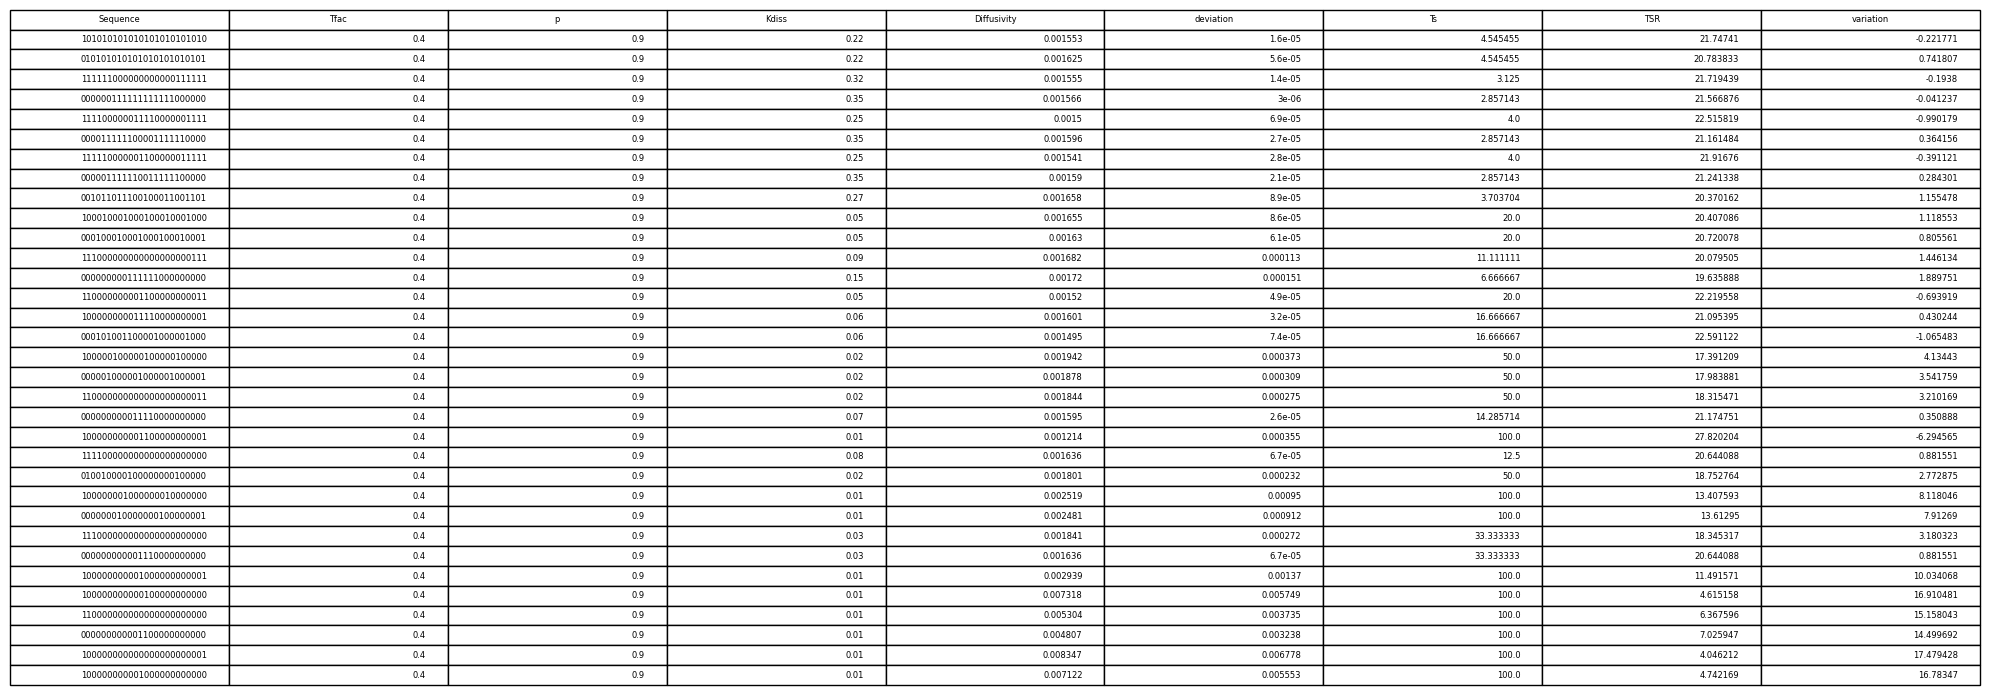

In [ ]:
# Image of the table
fig, ax= plt.subplots(figsize=(20,7))

df_table = df_table.drop(['index'], axis=1)
ax.axis('off')
ax.table(cellText=df_table.values, colLabels=df_table.columns, loc='center')
plt.savefig('table.png')  # saves the figure

plt.tight_layout()
plt.show()

In [ ]:
# LaTeX  - Table
df_picture = df_table.drop(['Tfac', 'p'], axis=1)
latex = df_picture.to_latex(index=False)

print(latex)

warnings.filterwarnings("ignore", category=FutureWarning)

\begin{tabular}{lrrrrrr}
\toprule
                Sequence &  Kdiss &  Diffusivity &  deviation &         Ts &       TSR &  variation \\
\midrule
101010101010101010101010 &   0.22 &     0.001553 &   0.000016 &   4.545455 & 21.747410 &  -0.221771 \\
010101010101010101010101 &   0.22 &     0.001625 &   0.000056 &   4.545455 & 20.783833 &   0.741807 \\
111111000000000000111111 &   0.32 &     0.001555 &   0.000014 &   3.125000 & 21.719439 &  -0.193800 \\
000000111111111111000000 &   0.35 &     0.001566 &   0.000003 &   2.857143 & 21.566876 &  -0.041237 \\
111100000011110000001111 &   0.25 &     0.001500 &   0.000069 &   4.000000 & 22.515819 &  -0.990179 \\
000011111100001111110000 &   0.35 &     0.001596 &   0.000027 &   2.857143 & 21.161484 &   0.364156 \\
111110000001100000011111 &   0.25 &     0.001541 &   0.000028 &   4.000000 & 21.916760 &  -0.391121 \\
000001111110011111100000 &   0.35 &     0.001590 &   0.000021 &   2.857143 & 21.241338 &   0.284301 \\
001011011100100011001101 &   0

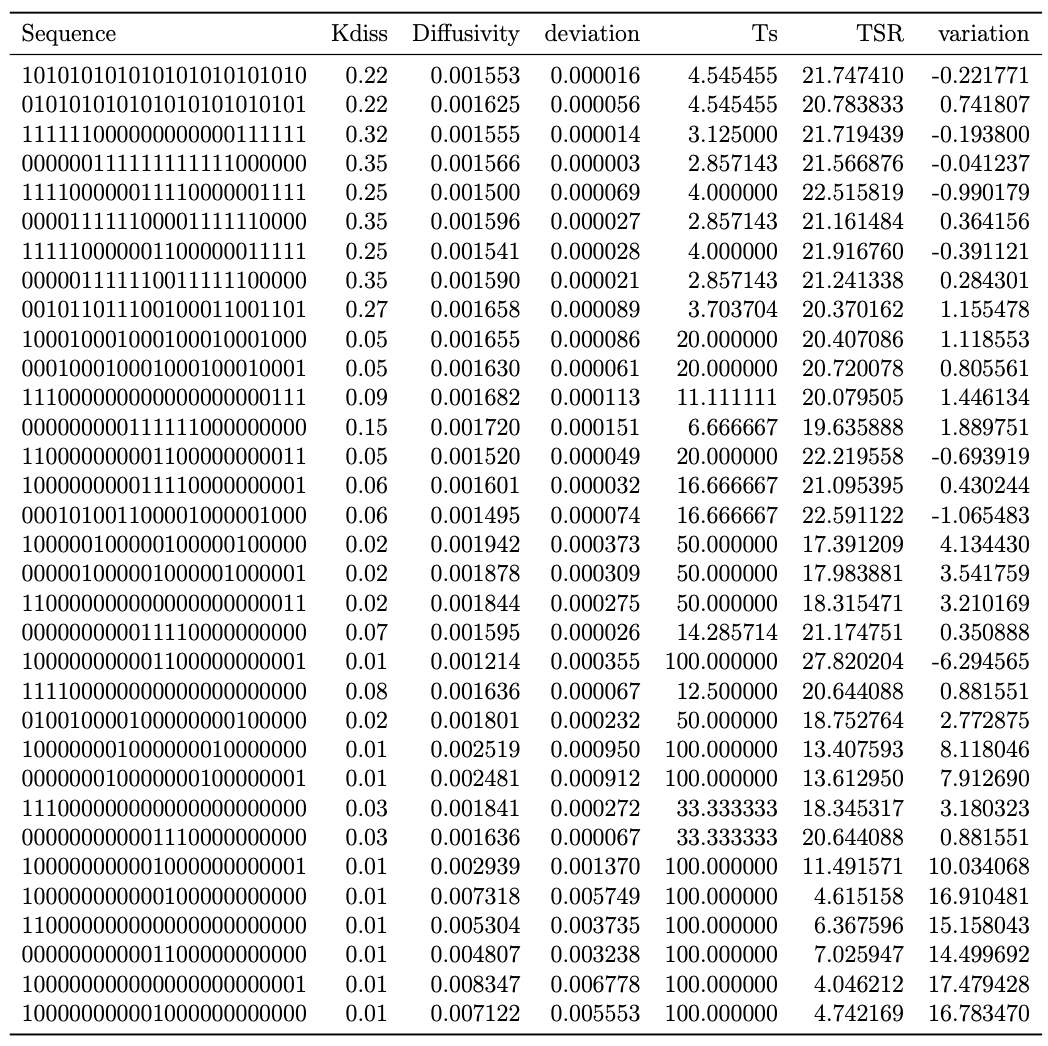